In [7]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import pickle
import itertools
from datetime import datetime
import alphalens
from alphalens.performance import mean_information_coefficient

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [9]:
Prices = pickle.load(open('Prices.pkl', 'rb'))

In [10]:
train_start = datetime(2016, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [11]:
whl = trainPrices['WHL.JO'].copy()
whl

high      low     open    close     volume    adj_close
Date                                                                  
2016-01-01  10015.0  10015.0  10015.0  10015.0        0.0  8272.963867
2016-01-04   9889.0   9571.0   9760.0   9605.0  1972991.0  7934.280273
2016-01-05   9912.0   9550.0   9630.0   9880.0  2359678.0  8161.446777
2016-01-06   9920.0   9645.0   9788.0   9788.0  2946740.0  8085.449219
2016-01-07   9763.0   9120.0   9600.0   9660.0  5489329.0  7979.713867
...             ...      ...      ...      ...        ...          ...
2017-12-25   6293.0   6293.0   6293.0   6293.0        0.0  5665.954102
2017-12-26   6293.0   6293.0   6293.0   6293.0        0.0  5665.954102
2017-12-27   6360.0   6242.0   6290.0   6329.0  3542933.0  5698.367188
2017-12-28   6447.0   6300.0   6320.0   6447.0  2857012.0  5804.608887
2017-12-29   6535.0   6370.0   6400.0   6515.0    73001.0  5865.833496

[517 rows x 6 columns]

In [12]:
ema26 = ta.ema(whl['adj_close'], length = 26)
ema12 = ta.ema(whl['adj_close'], length = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = ema12 - ema26
whl['macd_signal_line'] = ta.ema(whl['macd'], length = 9)

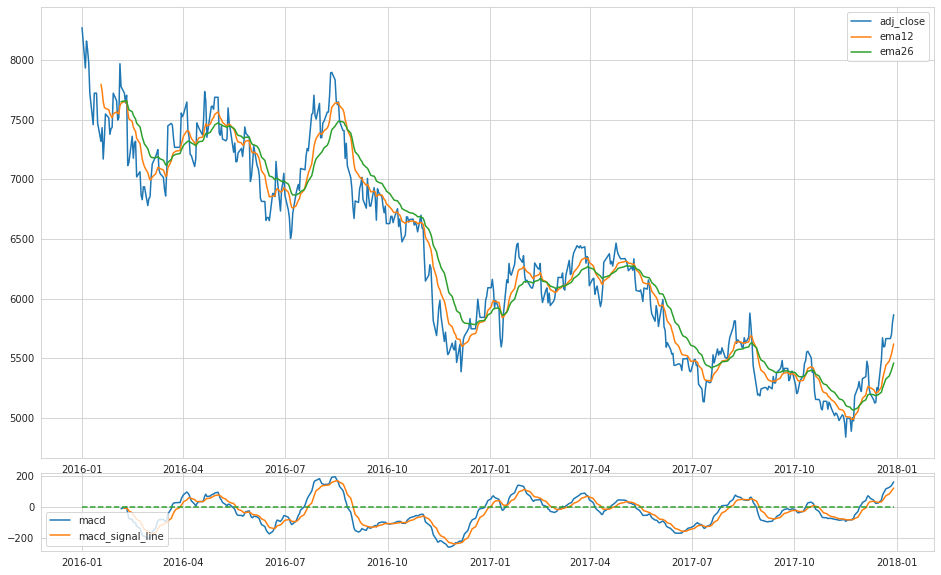

In [13]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['adj_close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('adj_close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal_line'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [14]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [15]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

In [16]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        norm_close = data['close']#.div(data['close'][0])
        
        ema26 = ta.ema(norm_close, length = 26)
        ema12 = ta.ema(norm_close, length = 12)
        macd = ema12.sub(ema26)
        macd_ema9 = ta.ema(macd, length = 9)
        macd_signal = macd_ema9.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


In [17]:
macd_data

macd_signal
Date       symbol              
2016-01-01 ABG.JO           NaN
2016-01-04 ABG.JO           NaN
2016-01-05 ABG.JO           NaN
2016-01-06 ABG.JO           NaN
2016-01-07 ABG.JO           NaN
...                         ...
2017-12-25 ZPLP.JO   -53.718039
2017-12-26 ZPLP.JO   -47.688752
2017-12-27 ZPLP.JO   -40.354182
2017-12-28 ZPLP.JO   -32.111094
2017-12-29 ZPLP.JO   -23.848948

[170990 rows x 1 columns]

In [18]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [19]:
prices_data.index = pd.to_datetime(prices_data.index)

In [20]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5, 10, 30]
)

Dropped 11.4% entries from factor data: 11.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [21]:
factor_data.groupby('factor_quantile').mean()

1D        2D        5D       10D       30D     factor
factor_quantile                                                             
1               -0.000944 -0.001207 -0.000934 -0.000149  0.001614 -37.101577
2                0.001037  0.001929  0.003709  0.004817  0.006973  -0.030018
3                0.002239  0.003591  0.006028  0.008642  0.016039  42.244324

In [22]:
alphalens.plotting.plot_quantile_statistics_table(factor_data)

Quantiles Statistics


min           max       mean         std  count  \
factor_quantile                                                            
1               -2066.242707      0.004138 -37.101577   98.863479  50729   
2                 -13.088489      8.455168  -0.030018    1.516741  50341   
3                  -0.187724  10178.252931  42.244324  231.421079  50488   

                   count %  
factor_quantile             
1                33.471674  
2                33.215667  
3                33.312659

In [23]:
alphalens.plotting.plot_information_table(factor_data)

Information Analysis


1D         2D         5D        10D        30D  \
IC Mean             0.001      0.001      0.003      0.004      0.008   
IC Std.             0.042      0.082      0.126      0.137      0.215   
Risk-Adjusted IC    0.018      0.017      0.023      0.032      0.038   
t-stat(IC)          7.157      6.774      9.072     12.600     14.856   
p-value(IC)         0.000      0.000      0.000      0.000      0.000   
IC Skew            16.079    174.664    120.341     93.954    113.727   
IC Kurtosis       918.658  50213.899  21526.527  15308.479  20586.111   

                    factor  factor_quantile  
IC Mean              1.644            1.998  
IC Std.            148.880            0.817  
Risk-Adjusted IC     0.011            2.445  
t-stat(IC)           4.299          951.998  
p-value(IC)          0.000            0.000  
IC Skew             38.544            0.003  
IC Kurtosis       2322.018           -1.503

In [24]:
alpha_summary = alphalens.performance.factor_alpha_beta(factor_data)
alpha_summary

1D        2D        5D       10D       30D
Ann. alpha  0.096541  0.263336  0.104797  0.063774  0.061961
beta        0.625600 -0.031071  0.319742  0.197605 -0.139880

In [25]:
factor_returns_df = alphalens.performance.factor_returns(factor_data).cumsum().add(1)

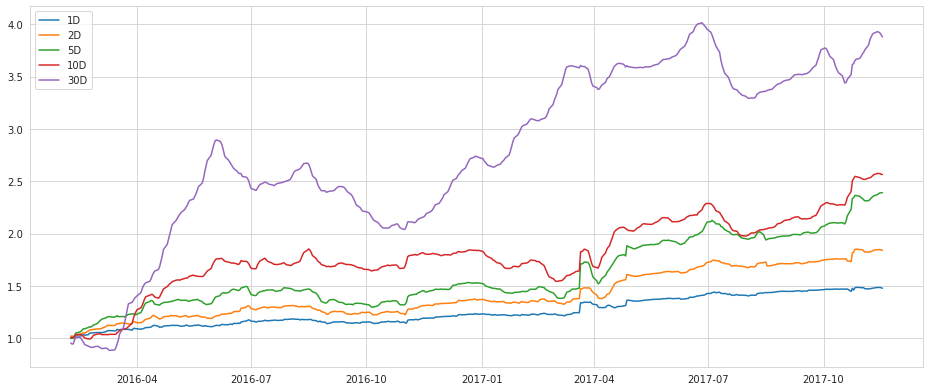

In [26]:
fig = plt.figure(figsize = (16, 8))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)

for forward_return in factor_returns_df.columns:
    ax1.plot(factor_returns_df.index, factor_returns_df[forward_return])
ax1.legend(tuple(factor_returns_df.columns.values), loc = 'upper left')
# ax1.set_xticklabels(' ')

Information Analysis


1D     2D      5D     10D     30D
IC Mean           0.040  0.057   0.064   0.062   0.066
IC Std.           0.145  0.144   0.139   0.133   0.130
Risk-Adjusted IC  0.276  0.394   0.460   0.464   0.505
t-stat(IC)          NaN    NaN   9.901  10.003  10.884
p-value(IC)         NaN    NaN   0.000   0.000   0.000
IC Skew             NaN    NaN   1.802   0.481   2.219
IC Kurtosis         NaN    NaN  12.153  18.012  15.623

<Figure size 432x288 with 0 Axes>

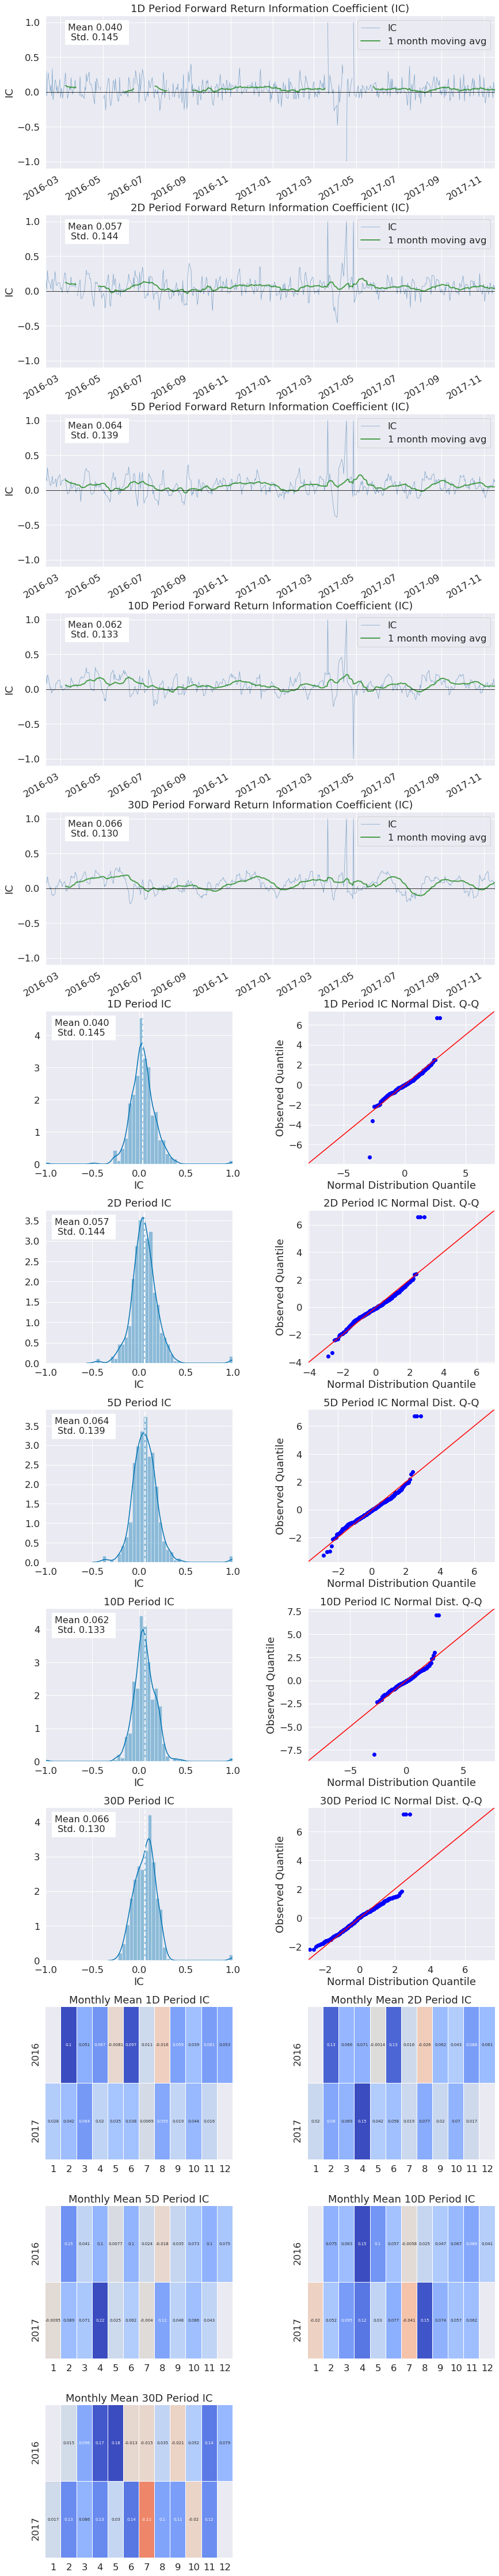

In [27]:
alphalens.tears.create_information_tear_sheet(factor_data)

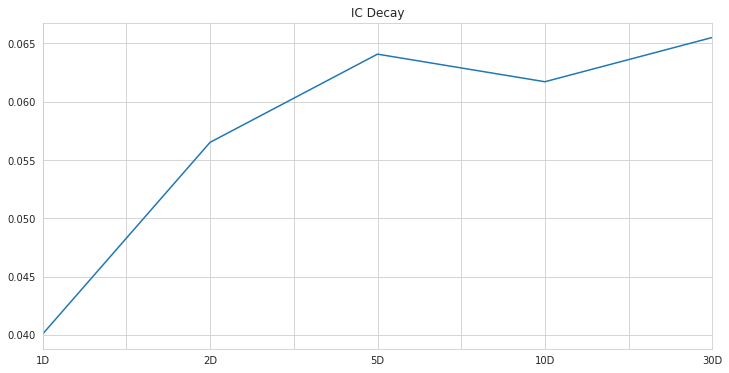

In [28]:
fig = plt.figure(figsize = (12, 6))
g = mean_information_coefficient(factor_data).plot(title = "IC Decay")

Returns Analysis


1D      2D      5D     10D  \
Ann. alpha                                      0.097   0.263   0.105   0.064   
beta                                            0.626  -0.031   0.320   0.198   
Mean Period Wise Return Top Quantile (bps)     17.329  13.354   7.927   4.850   
Mean Period Wise Return Bottom Quantile (bps) -19.872 -15.651  -9.395  -5.199   
Mean Period Wise Spread (bps)                  37.201  29.007  17.346  10.062   

                                                 30D  
Ann. alpha                                     0.062  
beta                                          -0.140  
Mean Period Wise Return Top Quantile (bps)     2.672  
Mean Period Wise Return Bottom Quantile (bps) -2.299  
Mean Period Wise Spread (bps)                  4.951

<Figure size 432x288 with 0 Axes>

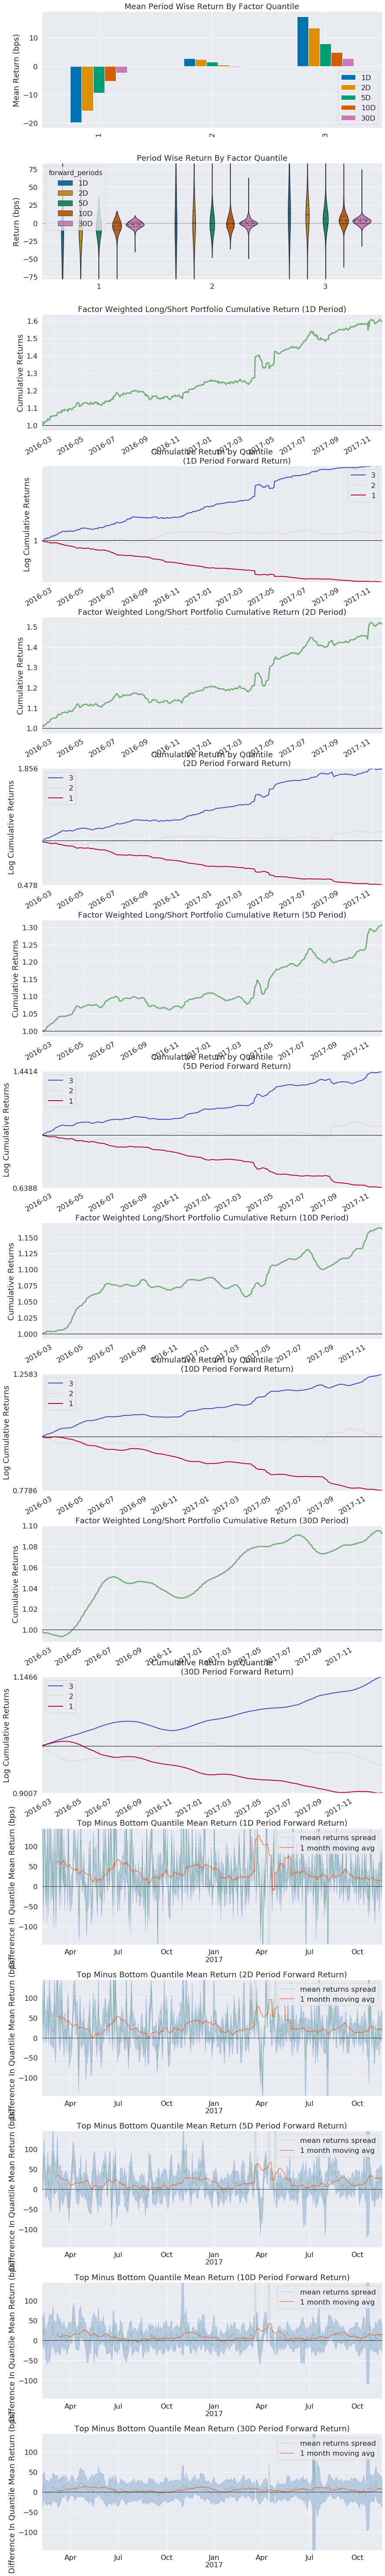

In [29]:
alphalens.tears.create_returns_tear_sheet(factor_data)

In [104]:
factor_data.describe()

2D             5D            10D            30D  \
count  126380.000000  126380.000000  126380.000000  126380.000000   
mean        0.001711       0.002998       0.004410       0.008709   
std         0.109200       0.128001       0.137971       0.224065   
min        -0.940711      -0.940711      -0.940711      -0.959684   
25%        -0.009783      -0.017286      -0.025234      -0.043527   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.009615       0.017647       0.026065       0.047619   
max        24.299999      24.299999      24.299999      41.166664   

                 60D            90D         factor  factor_quantile  
count  126380.000000  126380.000000  126380.000000    126380.000000  
mean        0.013657       0.016805       1.946750         1.998734  
std         0.253413       0.262670     159.911233         0.817141  
min        -0.940711      -0.930317   -2066.242707         1.000000  
25%        -0.059654      -0.076220      -4.224989         1.000000  
50%         0.000000       0.000000       0.000000         2.000000  
75%         0.068493       0.084567       4.014380         3.000000  
max        41.166664      41.166664   10178.252931         3.000000